# Recurrent Neural Networks

LSTM : Nifty50 Price Prediction

## Data Preprocessing

Importing Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Importing Training Set

In [32]:
dataset_train = pd.read_csv("dataset/NIFTY50_Training.csv") 
training_set = dataset_train.iloc[:,1:2].values

Feature Scaling

In [33]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [34]:
X_train = []
y_train = []

for i in np.arange(60, 991):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [35]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1] ,1))

## Building the LSTM RNN

Initailizing the RNN

In [36]:
RNN = Sequential()

Adding the first LSTM layer and some Dropout regularities

In [37]:
RNN.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
RNN.add(Dropout(rate=0.2))

Adding the Second LSTM Layer and some Dropout regularities

In [38]:
RNN.add(LSTM(units=50, return_sequences = True))
RNN.add(Dropout(rate=0.2))

Adding the Third LSTM Layer and some Dropout regularities

In [39]:
RNN.add(LSTM(units=50, return_sequences = True))
RNN.add(Dropout(rate=0.2))

Adding the Fourth LSTM Layer and some Dropout regularities

In [40]:
RNN.add(LSTM(units=50, return_sequences = False))
RNN.add(Dropout(rate=0.2))

Adding the output layer

In [41]:
RNN.add(Dense(units=1))

Compiling the RNN

In [42]:
RNN.compile(optimizer='adam',loss='mean_squared_error')

Training the RNN

In [43]:
RNN.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25


 1/30 [>.............................] - ETA: 6:30 - loss: 0.3734

 2/30 [=>............................] - ETA: 2s - loss: 0.3675  

 3/30 [==>...........................] - ETA: 2s - loss: 0.3230

 4/30 [===>..........................] - ETA: 2s - loss: 0.2932

 5/30 [====>.........................] - ETA: 2s - loss: 0.2543

 6/30 [=====>........................] - ETA: 1s - loss: 0.2176

 7/30 [======>.......................] - ETA: 1s - loss: 0.1895

 8/30 [=======>......................] - ETA: 1s - loss: 0.1728

 9/30 [========>.....................] - ETA: 1s - loss: 0.1641

10/30 [=========>....................] - ETA: 1s - loss: 0.1519

11/30 [==========>...................] - ETA: 1s - loss: 0.1406

12/30 [===========>..................] - ETA: 1s - loss: 0.1308

13/30 [============>.................] - ETA: 1s - loss: 0.1226

14/30 [=============>................] - ETA: 1s - loss: 0.1158

15/30 [==============>...............] - ETA: 1s - loss: 0.1098

16/30 [===============>..............] - ETA: 1s - loss: 0.1066

17/30 [================>.............] - ETA: 1s - loss: 0.1026

18/30 [=================>............] - ETA: 1s - loss: 0.0986

19/30 [==================>...........] - ETA: 0s - loss: 0.0952

20/30 [===================>..........] - ETA: 0s - loss: 0.0917

21/30 [====================>.........] - ETA: 0s - loss: 0.0880

22/30 [=====================>........] - ETA: 0s - loss: 0.0849

23/30 [======================>.......] - ETA: 0s - loss: 0.0819

24/30 [=======================>......] - ETA: 0s - loss: 0.0795

25/30 [========================>.....] - ETA: 0s - loss: 0.0771

26/30 [=========================>....] - ETA: 0s - loss: 0.0746

27/30 [==========================>...] - ETA: 0s - loss: 0.0723

28/30 [===========================>..] - ETA: 0s - loss: 0.0701

29/30 [============================>.] - ETA: 0s - loss: 0.0681

30/30 [==============================] - ETA: 0s - loss: 0.0679

30/30 [==============================] - 16s 89ms/step - loss: 0.0679


Epoch 2/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0099

 2/30 [=>............................] - ETA: 3s - loss: 0.0104

 3/30 [==>...........................] - ETA: 2s - loss: 0.0101

 4/30 [===>..........................] - ETA: 2s - loss: 0.0101

 5/30 [====>.........................] - ETA: 2s - loss: 0.0097

 6/30 [=====>........................] - ETA: 2s - loss: 0.0097

 7/30 [======>.......................] - ETA: 2s - loss: 0.0099

 8/30 [=======>......................] - ETA: 1s - loss: 0.0096

 9/30 [========>.....................] - ETA: 1s - loss: 0.0094

10/30 [=========>....................] - ETA: 1s - loss: 0.0092

11/30 [==========>...................] - ETA: 1s - loss: 0.0094

12/30 [===========>..................] - ETA: 1s - loss: 0.0092

13/30 [============>.................] - ETA: 1s - loss: 0.0091

14/30 [=============>................] - ETA: 1s - loss: 0.0091

15/30 [==============>...............] - ETA: 1s - loss: 0.0092

16/30 [===============>..............] - ETA: 1s - loss: 0.0093

17/30 [================>.............] - ETA: 1s - loss: 0.0091

18/30 [=================>............] - ETA: 1s - loss: 0.0091

19/30 [==================>...........] - ETA: 1s - loss: 0.0093

20/30 [===================>..........] - ETA: 0s - loss: 0.0093

21/30 [====================>.........] - ETA: 0s - loss: 0.0091

22/30 [=====================>........] - ETA: 0s - loss: 0.0091

23/30 [======================>.......] - ETA: 0s - loss: 0.0091

24/30 [=======================>......] - ETA: 0s - loss: 0.0091

25/30 [========================>.....] - ETA: 0s - loss: 0.0092

26/30 [=========================>....] - ETA: 0s - loss: 0.0092

27/30 [==========================>...] - ETA: 0s - loss: 0.0091

28/30 [===========================>..] - ETA: 0s - loss: 0.0090

29/30 [============================>.] - ETA: 0s - loss: 0.0090

30/30 [==============================] - ETA: 0s - loss: 0.0090

30/30 [==============================] - 3s 94ms/step - loss: 0.0090


Epoch 3/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0094

 2/30 [=>............................] - ETA: 2s - loss: 0.0083

 3/30 [==>...........................] - ETA: 2s - loss: 0.0082

 4/30 [===>..........................] - ETA: 2s - loss: 0.0077

 5/30 [====>.........................] - ETA: 2s - loss: 0.0087

 6/30 [=====>........................] - ETA: 2s - loss: 0.0081

 7/30 [======>.......................] - ETA: 2s - loss: 0.0079

 8/30 [=======>......................] - ETA: 2s - loss: 0.0075

 9/30 [========>.....................] - ETA: 2s - loss: 0.0073

10/30 [=========>....................] - ETA: 1s - loss: 0.0074

11/30 [==========>...................] - ETA: 1s - loss: 0.0074

12/30 [===========>..................] - ETA: 1s - loss: 0.0073

13/30 [============>.................] - ETA: 1s - loss: 0.0072

14/30 [=============>................] - ETA: 1s - loss: 0.0074

15/30 [==============>...............] - ETA: 1s - loss: 0.0075

16/30 [===============>..............] - ETA: 1s - loss: 0.0076

17/30 [================>.............] - ETA: 1s - loss: 0.0077

18/30 [=================>............] - ETA: 1s - loss: 0.0081

19/30 [==================>...........] - ETA: 1s - loss: 0.0080

20/30 [===================>..........] - ETA: 0s - loss: 0.0080

21/30 [====================>.........] - ETA: 0s - loss: 0.0078

22/30 [=====================>........] - ETA: 0s - loss: 0.0079

23/30 [======================>.......] - ETA: 0s - loss: 0.0078

24/30 [=======================>......] - ETA: 0s - loss: 0.0076

25/30 [========================>.....] - ETA: 0s - loss: 0.0075

26/30 [=========================>....] - ETA: 0s - loss: 0.0076

27/30 [==========================>...] - ETA: 0s - loss: 0.0076

28/30 [===========================>..] - ETA: 0s - loss: 0.0076

29/30 [============================>.] - ETA: 0s - loss: 0.0075

30/30 [==============================] - ETA: 0s - loss: 0.0075

30/30 [==============================] - 3s 96ms/step - loss: 0.0075


Epoch 4/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0055

 2/30 [=>............................] - ETA: 2s - loss: 0.0073

 3/30 [==>...........................] - ETA: 2s - loss: 0.0074

 4/30 [===>..........................] - ETA: 2s - loss: 0.0068

 5/30 [====>.........................] - ETA: 2s - loss: 0.0068

 6/30 [=====>........................] - ETA: 2s - loss: 0.0070

 7/30 [======>.......................] - ETA: 2s - loss: 0.0074

 8/30 [=======>......................] - ETA: 1s - loss: 0.0076

 9/30 [========>.....................] - ETA: 1s - loss: 0.0073

10/30 [=========>....................] - ETA: 1s - loss: 0.0072

11/30 [==========>...................] - ETA: 1s - loss: 0.0072

12/30 [===========>..................] - ETA: 1s - loss: 0.0075

13/30 [============>.................] - ETA: 1s - loss: 0.0075

14/30 [=============>................] - ETA: 1s - loss: 0.0074

15/30 [==============>...............] - ETA: 1s - loss: 0.0073

16/30 [===============>..............] - ETA: 1s - loss: 0.0073

17/30 [================>.............] - ETA: 1s - loss: 0.0073

18/30 [=================>............] - ETA: 1s - loss: 0.0072

19/30 [==================>...........] - ETA: 1s - loss: 0.0072

20/30 [===================>..........] - ETA: 0s - loss: 0.0074

21/30 [====================>.........] - ETA: 0s - loss: 0.0075

22/30 [=====================>........] - ETA: 0s - loss: 0.0075

23/30 [======================>.......] - ETA: 0s - loss: 0.0075

24/30 [=======================>......] - ETA: 0s - loss: 0.0076

25/30 [========================>.....] - ETA: 0s - loss: 0.0077

26/30 [=========================>....] - ETA: 0s - loss: 0.0076

27/30 [==========================>...] - ETA: 0s - loss: 0.0076

28/30 [===========================>..] - ETA: 0s - loss: 0.0075

29/30 [============================>.] - ETA: 0s - loss: 0.0074

30/30 [==============================] - ETA: 0s - loss: 0.0074

30/30 [==============================] - 3s 97ms/step - loss: 0.0074


Epoch 5/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0085

 2/30 [=>............................] - ETA: 2s - loss: 0.0069

 3/30 [==>...........................] - ETA: 2s - loss: 0.0077

 4/30 [===>..........................] - ETA: 2s - loss: 0.0070

 5/30 [====>.........................] - ETA: 2s - loss: 0.0069

 6/30 [=====>........................] - ETA: 2s - loss: 0.0069

 7/30 [======>.......................] - ETA: 2s - loss: 0.0065

 8/30 [=======>......................] - ETA: 1s - loss: 0.0064

 9/30 [========>.....................] - ETA: 1s - loss: 0.0062

10/30 [=========>....................] - ETA: 1s - loss: 0.0063

11/30 [==========>...................] - ETA: 1s - loss: 0.0064

12/30 [===========>..................] - ETA: 1s - loss: 0.0062

13/30 [============>.................] - ETA: 1s - loss: 0.0063

14/30 [=============>................] - ETA: 1s - loss: 0.0063

15/30 [==============>...............] - ETA: 1s - loss: 0.0063

16/30 [===============>..............] - ETA: 1s - loss: 0.0063

17/30 [================>.............] - ETA: 1s - loss: 0.0065

18/30 [=================>............] - ETA: 0s - loss: 0.0066

19/30 [==================>...........] - ETA: 0s - loss: 0.0065

20/30 [===================>..........] - ETA: 0s - loss: 0.0067

21/30 [====================>.........] - ETA: 0s - loss: 0.0067

22/30 [=====================>........] - ETA: 0s - loss: 0.0066

23/30 [======================>.......] - ETA: 0s - loss: 0.0068

24/30 [=======================>......] - ETA: 0s - loss: 0.0068

25/30 [========================>.....] - ETA: 0s - loss: 0.0068

26/30 [=========================>....] - ETA: 0s - loss: 0.0068

27/30 [==========================>...] - ETA: 0s - loss: 0.0068

28/30 [===========================>..] - ETA: 0s - loss: 0.0068

29/30 [============================>.] - ETA: 0s - loss: 0.0068

30/30 [==============================] - ETA: 0s - loss: 0.0068

30/30 [==============================] - 3s 87ms/step - loss: 0.0068


Epoch 6/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0090

 2/30 [=>............................] - ETA: 2s - loss: 0.0078

 3/30 [==>...........................] - ETA: 2s - loss: 0.0071

 4/30 [===>..........................] - ETA: 2s - loss: 0.0074

 5/30 [====>.........................] - ETA: 2s - loss: 0.0074

 6/30 [=====>........................] - ETA: 2s - loss: 0.0072

 7/30 [======>.......................] - ETA: 1s - loss: 0.0072

 8/30 [=======>......................] - ETA: 1s - loss: 0.0073

 9/30 [========>.....................] - ETA: 1s - loss: 0.0072

10/30 [=========>....................] - ETA: 1s - loss: 0.0070

11/30 [==========>...................] - ETA: 1s - loss: 0.0070

12/30 [===========>..................] - ETA: 1s - loss: 0.0069

13/30 [============>.................] - ETA: 1s - loss: 0.0068

14/30 [=============>................] - ETA: 1s - loss: 0.0069

15/30 [==============>...............] - ETA: 1s - loss: 0.0067

16/30 [===============>..............] - ETA: 1s - loss: 0.0070

17/30 [================>.............] - ETA: 1s - loss: 0.0070

18/30 [=================>............] - ETA: 1s - loss: 0.0069

19/30 [==================>...........] - ETA: 1s - loss: 0.0068

20/30 [===================>..........] - ETA: 0s - loss: 0.0068

21/30 [====================>.........] - ETA: 0s - loss: 0.0069

22/30 [=====================>........] - ETA: 0s - loss: 0.0068

23/30 [======================>.......] - ETA: 0s - loss: 0.0067

24/30 [=======================>......] - ETA: 0s - loss: 0.0066

25/30 [========================>.....] - ETA: 0s - loss: 0.0065

26/30 [=========================>....] - ETA: 0s - loss: 0.0065

27/30 [==========================>...] - ETA: 0s - loss: 0.0066

28/30 [===========================>..] - ETA: 0s - loss: 0.0066

29/30 [============================>.] - ETA: 0s - loss: 0.0066

30/30 [==============================] - ETA: 0s - loss: 0.0066

30/30 [==============================] - 3s 93ms/step - loss: 0.0066


Epoch 7/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0067

 2/30 [=>............................] - ETA: 2s - loss: 0.0056

 3/30 [==>...........................] - ETA: 2s - loss: 0.0058

 4/30 [===>..........................] - ETA: 2s - loss: 0.0066

 5/30 [====>.........................] - ETA: 2s - loss: 0.0065

 6/30 [=====>........................] - ETA: 2s - loss: 0.0064

 7/30 [======>.......................] - ETA: 2s - loss: 0.0063

 8/30 [=======>......................] - ETA: 2s - loss: 0.0062

 9/30 [========>.....................] - ETA: 1s - loss: 0.0060

10/30 [=========>....................] - ETA: 1s - loss: 0.0063

11/30 [==========>...................] - ETA: 1s - loss: 0.0063

12/30 [===========>..................] - ETA: 1s - loss: 0.0062

13/30 [============>.................] - ETA: 1s - loss: 0.0065

14/30 [=============>................] - ETA: 1s - loss: 0.0064

15/30 [==============>...............] - ETA: 1s - loss: 0.0066

16/30 [===============>..............] - ETA: 1s - loss: 0.0066

17/30 [================>.............] - ETA: 1s - loss: 0.0066

18/30 [=================>............] - ETA: 1s - loss: 0.0069

19/30 [==================>...........] - ETA: 1s - loss: 0.0068

20/30 [===================>..........] - ETA: 1s - loss: 0.0067

21/30 [====================>.........] - ETA: 0s - loss: 0.0067

22/30 [=====================>........] - ETA: 0s - loss: 0.0069

23/30 [======================>.......] - ETA: 0s - loss: 0.0069

24/30 [=======================>......] - ETA: 0s - loss: 0.0068

25/30 [========================>.....] - ETA: 0s - loss: 0.0067

26/30 [=========================>....] - ETA: 0s - loss: 0.0068

27/30 [==========================>...] - ETA: 0s - loss: 0.0068

28/30 [===========================>..] - ETA: 0s - loss: 0.0068

29/30 [============================>.] - ETA: 0s - loss: 0.0069

30/30 [==============================] - ETA: 0s - loss: 0.0070

30/30 [==============================] - 3s 98ms/step - loss: 0.0070


Epoch 8/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0067

 2/30 [=>............................] - ETA: 2s - loss: 0.0081

 3/30 [==>...........................] - ETA: 2s - loss: 0.0073

 4/30 [===>..........................] - ETA: 2s - loss: 0.0069

 5/30 [====>.........................] - ETA: 2s - loss: 0.0074

 6/30 [=====>........................] - ETA: 2s - loss: 0.0073

 7/30 [======>.......................] - ETA: 2s - loss: 0.0079

 8/30 [=======>......................] - ETA: 2s - loss: 0.0077

 9/30 [========>.....................] - ETA: 1s - loss: 0.0075

10/30 [=========>....................] - ETA: 1s - loss: 0.0074

11/30 [==========>...................] - ETA: 1s - loss: 0.0073

12/30 [===========>..................] - ETA: 1s - loss: 0.0071

13/30 [============>.................] - ETA: 1s - loss: 0.0069

14/30 [=============>................] - ETA: 1s - loss: 0.0068

15/30 [==============>...............] - ETA: 1s - loss: 0.0066

16/30 [===============>..............] - ETA: 1s - loss: 0.0066

17/30 [================>.............] - ETA: 1s - loss: 0.0066

18/30 [=================>............] - ETA: 1s - loss: 0.0066

19/30 [==================>...........] - ETA: 0s - loss: 0.0066

20/30 [===================>..........] - ETA: 0s - loss: 0.0065

21/30 [====================>.........] - ETA: 0s - loss: 0.0063

22/30 [=====================>........] - ETA: 0s - loss: 0.0064

23/30 [======================>.......] - ETA: 0s - loss: 0.0063

24/30 [=======================>......] - ETA: 0s - loss: 0.0063

25/30 [========================>.....] - ETA: 0s - loss: 0.0063

26/30 [=========================>....] - ETA: 0s - loss: 0.0063

27/30 [==========================>...] - ETA: 0s - loss: 0.0063

28/30 [===========================>..] - ETA: 0s - loss: 0.0062

29/30 [============================>.] - ETA: 0s - loss: 0.0061

30/30 [==============================] - ETA: 0s - loss: 0.0061

30/30 [==============================] - 3s 92ms/step - loss: 0.0061


Epoch 9/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0067

 2/30 [=>............................] - ETA: 2s - loss: 0.0075

 3/30 [==>...........................] - ETA: 2s - loss: 0.0080

 4/30 [===>..........................] - ETA: 2s - loss: 0.0075

 5/30 [====>.........................] - ETA: 2s - loss: 0.0084

 6/30 [=====>........................] - ETA: 2s - loss: 0.0090

 7/30 [======>.......................] - ETA: 2s - loss: 0.0089

 8/30 [=======>......................] - ETA: 2s - loss: 0.0089

 9/30 [========>.....................] - ETA: 2s - loss: 0.0088

10/30 [=========>....................] - ETA: 2s - loss: 0.0091

11/30 [==========>...................] - ETA: 2s - loss: 0.0088

12/30 [===========>..................] - ETA: 2s - loss: 0.0085

13/30 [============>.................] - ETA: 2s - loss: 0.0082

14/30 [=============>................] - ETA: 1s - loss: 0.0082

15/30 [==============>...............] - ETA: 1s - loss: 0.0081

16/30 [===============>..............] - ETA: 1s - loss: 0.0081

17/30 [================>.............] - ETA: 1s - loss: 0.0079

18/30 [=================>............] - ETA: 1s - loss: 0.0077

19/30 [==================>...........] - ETA: 1s - loss: 0.0077

20/30 [===================>..........] - ETA: 1s - loss: 0.0075

21/30 [====================>.........] - ETA: 1s - loss: 0.0075

22/30 [=====================>........] - ETA: 0s - loss: 0.0074

23/30 [======================>.......] - ETA: 0s - loss: 0.0073

24/30 [=======================>......] - ETA: 0s - loss: 0.0073

25/30 [========================>.....] - ETA: 0s - loss: 0.0073

26/30 [=========================>....] - ETA: 0s - loss: 0.0071

27/30 [==========================>...] - ETA: 0s - loss: 0.0071

28/30 [===========================>..] - ETA: 0s - loss: 0.0070

29/30 [============================>.] - ETA: 0s - loss: 0.0070

30/30 [==============================] - ETA: 0s - loss: 0.0070

30/30 [==============================] - 4s 120ms/step - loss: 0.0070


Epoch 10/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0053

 2/30 [=>............................] - ETA: 2s - loss: 0.0053

 3/30 [==>...........................] - ETA: 2s - loss: 0.0055

 4/30 [===>..........................] - ETA: 2s - loss: 0.0061

 5/30 [====>.........................] - ETA: 2s - loss: 0.0057

 6/30 [=====>........................] - ETA: 2s - loss: 0.0057

 7/30 [======>.......................] - ETA: 2s - loss: 0.0055

 8/30 [=======>......................] - ETA: 1s - loss: 0.0057

 9/30 [========>.....................] - ETA: 1s - loss: 0.0062

10/30 [=========>....................] - ETA: 1s - loss: 0.0064

11/30 [==========>...................] - ETA: 1s - loss: 0.0061

12/30 [===========>..................] - ETA: 1s - loss: 0.0067

13/30 [============>.................] - ETA: 1s - loss: 0.0067

14/30 [=============>................] - ETA: 1s - loss: 0.0067

15/30 [==============>...............] - ETA: 1s - loss: 0.0068

16/30 [===============>..............] - ETA: 1s - loss: 0.0071

17/30 [================>.............] - ETA: 1s - loss: 0.0073

18/30 [=================>............] - ETA: 1s - loss: 0.0071

19/30 [==================>...........] - ETA: 1s - loss: 0.0071

20/30 [===================>..........] - ETA: 0s - loss: 0.0071

21/30 [====================>.........] - ETA: 0s - loss: 0.0070

22/30 [=====================>........] - ETA: 0s - loss: 0.0069

23/30 [======================>.......] - ETA: 0s - loss: 0.0068

24/30 [=======================>......] - ETA: 0s - loss: 0.0068

25/30 [========================>.....] - ETA: 0s - loss: 0.0068

26/30 [=========================>....] - ETA: 0s - loss: 0.0067

27/30 [==========================>...] - ETA: 0s - loss: 0.0068

28/30 [===========================>..] - ETA: 0s - loss: 0.0068

29/30 [============================>.] - ETA: 0s - loss: 0.0068

30/30 [==============================] - ETA: 0s - loss: 0.0068

30/30 [==============================] - 3s 95ms/step - loss: 0.0068


Epoch 11/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0073

 2/30 [=>............................] - ETA: 2s - loss: 0.0076

 3/30 [==>...........................] - ETA: 2s - loss: 0.0083

 4/30 [===>..........................] - ETA: 2s - loss: 0.0078

 5/30 [====>.........................] - ETA: 2s - loss: 0.0072

 6/30 [=====>........................] - ETA: 2s - loss: 0.0071

 7/30 [======>.......................] - ETA: 2s - loss: 0.0070

 8/30 [=======>......................] - ETA: 2s - loss: 0.0070

 9/30 [========>.....................] - ETA: 2s - loss: 0.0067

10/30 [=========>....................] - ETA: 1s - loss: 0.0064

11/30 [==========>...................] - ETA: 1s - loss: 0.0062

12/30 [===========>..................] - ETA: 1s - loss: 0.0062

13/30 [============>.................] - ETA: 1s - loss: 0.0060

14/30 [=============>................] - ETA: 1s - loss: 0.0059

15/30 [==============>...............] - ETA: 1s - loss: 0.0060

16/30 [===============>..............] - ETA: 1s - loss: 0.0058

17/30 [================>.............] - ETA: 1s - loss: 0.0057

18/30 [=================>............] - ETA: 1s - loss: 0.0057

19/30 [==================>...........] - ETA: 1s - loss: 0.0058

20/30 [===================>..........] - ETA: 1s - loss: 0.0058

21/30 [====================>.........] - ETA: 0s - loss: 0.0059

22/30 [=====================>........] - ETA: 0s - loss: 0.0060

23/30 [======================>.......] - ETA: 0s - loss: 0.0059

24/30 [=======================>......] - ETA: 0s - loss: 0.0060

25/30 [========================>.....] - ETA: 0s - loss: 0.0060

26/30 [=========================>....] - ETA: 0s - loss: 0.0060

27/30 [==========================>...] - ETA: 0s - loss: 0.0059

28/30 [===========================>..] - ETA: 0s - loss: 0.0059

29/30 [============================>.] - ETA: 0s - loss: 0.0059

30/30 [==============================] - ETA: 0s - loss: 0.0059

30/30 [==============================] - 3s 99ms/step - loss: 0.0059


Epoch 12/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0072

 2/30 [=>............................] - ETA: 2s - loss: 0.0070

 3/30 [==>...........................] - ETA: 2s - loss: 0.0069

 4/30 [===>..........................] - ETA: 2s - loss: 0.0072

 5/30 [====>.........................] - ETA: 2s - loss: 0.0069

 6/30 [=====>........................] - ETA: 2s - loss: 0.0068

 7/30 [======>.......................] - ETA: 2s - loss: 0.0073

 8/30 [=======>......................] - ETA: 2s - loss: 0.0076

 9/30 [========>.....................] - ETA: 1s - loss: 0.0075

10/30 [=========>....................] - ETA: 1s - loss: 0.0072

11/30 [==========>...................] - ETA: 1s - loss: 0.0076

12/30 [===========>..................] - ETA: 1s - loss: 0.0076

13/30 [============>.................] - ETA: 1s - loss: 0.0074

14/30 [=============>................] - ETA: 1s - loss: 0.0074

15/30 [==============>...............] - ETA: 1s - loss: 0.0072

16/30 [===============>..............] - ETA: 1s - loss: 0.0072

17/30 [================>.............] - ETA: 1s - loss: 0.0073

18/30 [=================>............] - ETA: 1s - loss: 0.0073

19/30 [==================>...........] - ETA: 1s - loss: 0.0071

20/30 [===================>..........] - ETA: 0s - loss: 0.0069

21/30 [====================>.........] - ETA: 0s - loss: 0.0068

22/30 [=====================>........] - ETA: 0s - loss: 0.0067

23/30 [======================>.......] - ETA: 0s - loss: 0.0068

24/30 [=======================>......] - ETA: 0s - loss: 0.0067

25/30 [========================>.....] - ETA: 0s - loss: 0.0066

26/30 [=========================>....] - ETA: 0s - loss: 0.0066

27/30 [==========================>...] - ETA: 0s - loss: 0.0066

28/30 [===========================>..] - ETA: 0s - loss: 0.0065

29/30 [============================>.] - ETA: 0s - loss: 0.0064

30/30 [==============================] - ETA: 0s - loss: 0.0064

30/30 [==============================] - 3s 95ms/step - loss: 0.0064


Epoch 13/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0049

 2/30 [=>............................] - ETA: 2s - loss: 0.0055

 3/30 [==>...........................] - ETA: 2s - loss: 0.0060

 4/30 [===>..........................] - ETA: 2s - loss: 0.0061

 5/30 [====>.........................] - ETA: 2s - loss: 0.0067

 6/30 [=====>........................] - ETA: 2s - loss: 0.0067

 7/30 [======>.......................] - ETA: 2s - loss: 0.0070

 8/30 [=======>......................] - ETA: 2s - loss: 0.0067

 9/30 [========>.....................] - ETA: 2s - loss: 0.0068

10/30 [=========>....................] - ETA: 2s - loss: 0.0065

11/30 [==========>...................] - ETA: 2s - loss: 0.0070

12/30 [===========>..................] - ETA: 1s - loss: 0.0070

13/30 [============>.................] - ETA: 1s - loss: 0.0070

14/30 [=============>................] - ETA: 1s - loss: 0.0071

15/30 [==============>...............] - ETA: 1s - loss: 0.0069

16/30 [===============>..............] - ETA: 1s - loss: 0.0070

17/30 [================>.............] - ETA: 1s - loss: 0.0070

18/30 [=================>............] - ETA: 1s - loss: 0.0069

19/30 [==================>...........] - ETA: 1s - loss: 0.0069

20/30 [===================>..........] - ETA: 0s - loss: 0.0069

21/30 [====================>.........] - ETA: 0s - loss: 0.0068

22/30 [=====================>........] - ETA: 0s - loss: 0.0068

23/30 [======================>.......] - ETA: 0s - loss: 0.0068

24/30 [=======================>......] - ETA: 0s - loss: 0.0067

25/30 [========================>.....] - ETA: 0s - loss: 0.0066

26/30 [=========================>....] - ETA: 0s - loss: 0.0066

27/30 [==========================>...] - ETA: 0s - loss: 0.0066

28/30 [===========================>..] - ETA: 0s - loss: 0.0065

29/30 [============================>.] - ETA: 0s - loss: 0.0065

30/30 [==============================] - ETA: 0s - loss: 0.0065

30/30 [==============================] - 3s 95ms/step - loss: 0.0065


Epoch 14/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0074

 2/30 [=>............................] - ETA: 2s - loss: 0.0062

 3/30 [==>...........................] - ETA: 2s - loss: 0.0058

 4/30 [===>..........................] - ETA: 2s - loss: 0.0054

 5/30 [====>.........................] - ETA: 2s - loss: 0.0054

 6/30 [=====>........................] - ETA: 2s - loss: 0.0054

 7/30 [======>.......................] - ETA: 2s - loss: 0.0054

 8/30 [=======>......................] - ETA: 2s - loss: 0.0053

 9/30 [========>.....................] - ETA: 1s - loss: 0.0053

10/30 [=========>....................] - ETA: 1s - loss: 0.0053

11/30 [==========>...................] - ETA: 1s - loss: 0.0054

12/30 [===========>..................] - ETA: 1s - loss: 0.0053

13/30 [============>.................] - ETA: 1s - loss: 0.0052

14/30 [=============>................] - ETA: 1s - loss: 0.0052

15/30 [==============>...............] - ETA: 1s - loss: 0.0052

16/30 [===============>..............] - ETA: 1s - loss: 0.0051

17/30 [================>.............] - ETA: 1s - loss: 0.0050

18/30 [=================>............] - ETA: 1s - loss: 0.0051

19/30 [==================>...........] - ETA: 1s - loss: 0.0051

20/30 [===================>..........] - ETA: 1s - loss: 0.0051

21/30 [====================>.........] - ETA: 1s - loss: 0.0051

22/30 [=====================>........] - ETA: 0s - loss: 0.0051

23/30 [======================>.......] - ETA: 0s - loss: 0.0050

24/30 [=======================>......] - ETA: 0s - loss: 0.0049

25/30 [========================>.....] - ETA: 0s - loss: 0.0049

26/30 [=========================>....] - ETA: 0s - loss: 0.0049

27/30 [==========================>...] - ETA: 0s - loss: 0.0049

28/30 [===========================>..] - ETA: 0s - loss: 0.0049

29/30 [============================>.] - ETA: 0s - loss: 0.0049

30/30 [==============================] - ETA: 0s - loss: 0.0049

30/30 [==============================] - 3s 105ms/step - loss: 0.0049


Epoch 15/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0066

 2/30 [=>............................] - ETA: 2s - loss: 0.0057

 3/30 [==>...........................] - ETA: 2s - loss: 0.0056

 4/30 [===>..........................] - ETA: 2s - loss: 0.0052

 5/30 [====>.........................] - ETA: 2s - loss: 0.0055

 6/30 [=====>........................] - ETA: 2s - loss: 0.0053

 7/30 [======>.......................] - ETA: 2s - loss: 0.0048

 8/30 [=======>......................] - ETA: 2s - loss: 0.0049

 9/30 [========>.....................] - ETA: 2s - loss: 0.0050

10/30 [=========>....................] - ETA: 2s - loss: 0.0047

11/30 [==========>...................] - ETA: 1s - loss: 0.0049

12/30 [===========>..................] - ETA: 1s - loss: 0.0050

13/30 [============>.................] - ETA: 1s - loss: 0.0050

14/30 [=============>................] - ETA: 1s - loss: 0.0049

15/30 [==============>...............] - ETA: 1s - loss: 0.0049

16/30 [===============>..............] - ETA: 1s - loss: 0.0051

17/30 [================>.............] - ETA: 1s - loss: 0.0051

18/30 [=================>............] - ETA: 1s - loss: 0.0052

19/30 [==================>...........] - ETA: 1s - loss: 0.0050

20/30 [===================>..........] - ETA: 1s - loss: 0.0051

21/30 [====================>.........] - ETA: 0s - loss: 0.0051

22/30 [=====================>........] - ETA: 0s - loss: 0.0051

23/30 [======================>.......] - ETA: 0s - loss: 0.0051

24/30 [=======================>......] - ETA: 0s - loss: 0.0050

25/30 [========================>.....] - ETA: 0s - loss: 0.0051

26/30 [=========================>....] - ETA: 0s - loss: 0.0051

27/30 [==========================>...] - ETA: 0s - loss: 0.0051

28/30 [===========================>..] - ETA: 0s - loss: 0.0051

29/30 [============================>.] - ETA: 0s - loss: 0.0052

30/30 [==============================] - ETA: 0s - loss: 0.0051

30/30 [==============================] - 3s 99ms/step - loss: 0.0051


Epoch 16/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0049

 2/30 [=>............................] - ETA: 3s - loss: 0.0052

 3/30 [==>...........................] - ETA: 3s - loss: 0.0057

 4/30 [===>..........................] - ETA: 3s - loss: 0.0059

 5/30 [====>.........................] - ETA: 2s - loss: 0.0054

 6/30 [=====>........................] - ETA: 2s - loss: 0.0055

 7/30 [======>.......................] - ETA: 2s - loss: 0.0052

 8/30 [=======>......................] - ETA: 2s - loss: 0.0051

 9/30 [========>.....................] - ETA: 2s - loss: 0.0050

10/30 [=========>....................] - ETA: 1s - loss: 0.0052

11/30 [==========>...................] - ETA: 1s - loss: 0.0051

12/30 [===========>..................] - ETA: 1s - loss: 0.0051

13/30 [============>.................] - ETA: 1s - loss: 0.0050

14/30 [=============>................] - ETA: 1s - loss: 0.0050

15/30 [==============>...............] - ETA: 1s - loss: 0.0049

16/30 [===============>..............] - ETA: 1s - loss: 0.0050

17/30 [================>.............] - ETA: 1s - loss: 0.0052

18/30 [=================>............] - ETA: 1s - loss: 0.0050

19/30 [==================>...........] - ETA: 0s - loss: 0.0050

20/30 [===================>..........] - ETA: 0s - loss: 0.0053

21/30 [====================>.........] - ETA: 0s - loss: 0.0054

22/30 [=====================>........] - ETA: 0s - loss: 0.0054

23/30 [======================>.......] - ETA: 0s - loss: 0.0054

24/30 [=======================>......] - ETA: 0s - loss: 0.0054

25/30 [========================>.....] - ETA: 0s - loss: 0.0053

26/30 [=========================>....] - ETA: 0s - loss: 0.0053

27/30 [==========================>...] - ETA: 0s - loss: 0.0053

28/30 [===========================>..] - ETA: 0s - loss: 0.0053

29/30 [============================>.] - ETA: 0s - loss: 0.0054

30/30 [==============================] - ETA: 0s - loss: 0.0054

30/30 [==============================] - 3s 88ms/step - loss: 0.0054


Epoch 17/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0084

 2/30 [=>............................] - ETA: 2s - loss: 0.0102

 3/30 [==>...........................] - ETA: 2s - loss: 0.0095

 4/30 [===>..........................] - ETA: 2s - loss: 0.0083

 5/30 [====>.........................] - ETA: 2s - loss: 0.0078

 6/30 [=====>........................] - ETA: 2s - loss: 0.0079

 7/30 [======>.......................] - ETA: 2s - loss: 0.0079

 8/30 [=======>......................] - ETA: 1s - loss: 0.0077

 9/30 [========>.....................] - ETA: 1s - loss: 0.0072

10/30 [=========>....................] - ETA: 1s - loss: 0.0072

11/30 [==========>...................] - ETA: 1s - loss: 0.0075

12/30 [===========>..................] - ETA: 1s - loss: 0.0075

13/30 [============>.................] - ETA: 1s - loss: 0.0072

14/30 [=============>................] - ETA: 1s - loss: 0.0070

15/30 [==============>...............] - ETA: 1s - loss: 0.0070

16/30 [===============>..............] - ETA: 1s - loss: 0.0070

17/30 [================>.............] - ETA: 1s - loss: 0.0069

18/30 [=================>............] - ETA: 1s - loss: 0.0067

19/30 [==================>...........] - ETA: 1s - loss: 0.0066

20/30 [===================>..........] - ETA: 0s - loss: 0.0065

21/30 [====================>.........] - ETA: 0s - loss: 0.0064

22/30 [=====================>........] - ETA: 0s - loss: 0.0063

23/30 [======================>.......] - ETA: 0s - loss: 0.0063

24/30 [=======================>......] - ETA: 0s - loss: 0.0062

25/30 [========================>.....] - ETA: 0s - loss: 0.0061

26/30 [=========================>....] - ETA: 0s - loss: 0.0062

27/30 [==========================>...] - ETA: 0s - loss: 0.0060

28/30 [===========================>..] - ETA: 0s - loss: 0.0060

29/30 [============================>.] - ETA: 0s - loss: 0.0060

30/30 [==============================] - ETA: 0s - loss: 0.0059

30/30 [==============================] - 3s 94ms/step - loss: 0.0059


Epoch 18/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0066

 2/30 [=>............................] - ETA: 2s - loss: 0.0060

 3/30 [==>...........................] - ETA: 2s - loss: 0.0069

 4/30 [===>..........................] - ETA: 2s - loss: 0.0060

 5/30 [====>.........................] - ETA: 2s - loss: 0.0055

 6/30 [=====>........................] - ETA: 2s - loss: 0.0052

 7/30 [======>.......................] - ETA: 2s - loss: 0.0054

 8/30 [=======>......................] - ETA: 2s - loss: 0.0055

 9/30 [========>.....................] - ETA: 1s - loss: 0.0053

10/30 [=========>....................] - ETA: 1s - loss: 0.0055

11/30 [==========>...................] - ETA: 1s - loss: 0.0053

12/30 [===========>..................] - ETA: 1s - loss: 0.0053

13/30 [============>.................] - ETA: 1s - loss: 0.0052

14/30 [=============>................] - ETA: 1s - loss: 0.0053

15/30 [==============>...............] - ETA: 1s - loss: 0.0053

16/30 [===============>..............] - ETA: 1s - loss: 0.0051

17/30 [================>.............] - ETA: 1s - loss: 0.0053

18/30 [=================>............] - ETA: 1s - loss: 0.0052

19/30 [==================>...........] - ETA: 1s - loss: 0.0052

20/30 [===================>..........] - ETA: 0s - loss: 0.0053

21/30 [====================>.........] - ETA: 0s - loss: 0.0052

22/30 [=====================>........] - ETA: 0s - loss: 0.0052

23/30 [======================>.......] - ETA: 0s - loss: 0.0052

24/30 [=======================>......] - ETA: 0s - loss: 0.0051

25/30 [========================>.....] - ETA: 0s - loss: 0.0051

26/30 [=========================>....] - ETA: 0s - loss: 0.0052

27/30 [==========================>...] - ETA: 0s - loss: 0.0052

28/30 [===========================>..] - ETA: 0s - loss: 0.0052

29/30 [============================>.] - ETA: 0s - loss: 0.0052

30/30 [==============================] - ETA: 0s - loss: 0.0052

30/30 [==============================] - 3s 99ms/step - loss: 0.0052


Epoch 19/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0030

 2/30 [=>............................] - ETA: 2s - loss: 0.0046

 3/30 [==>...........................] - ETA: 2s - loss: 0.0054

 4/30 [===>..........................] - ETA: 2s - loss: 0.0052

 5/30 [====>.........................] - ETA: 2s - loss: 0.0051

 6/30 [=====>........................] - ETA: 2s - loss: 0.0056

 7/30 [======>.......................] - ETA: 1s - loss: 0.0054

 8/30 [=======>......................] - ETA: 1s - loss: 0.0055

 9/30 [========>.....................] - ETA: 1s - loss: 0.0055

10/30 [=========>....................] - ETA: 1s - loss: 0.0057

11/30 [==========>...................] - ETA: 1s - loss: 0.0055

12/30 [===========>..................] - ETA: 1s - loss: 0.0054

13/30 [============>.................] - ETA: 1s - loss: 0.0053

14/30 [=============>................] - ETA: 1s - loss: 0.0051

15/30 [==============>...............] - ETA: 1s - loss: 0.0052

16/30 [===============>..............] - ETA: 1s - loss: 0.0050

17/30 [================>.............] - ETA: 1s - loss: 0.0051

18/30 [=================>............] - ETA: 1s - loss: 0.0050

19/30 [==================>...........] - ETA: 0s - loss: 0.0049

20/30 [===================>..........] - ETA: 0s - loss: 0.0049

21/30 [====================>.........] - ETA: 0s - loss: 0.0049

22/30 [=====================>........] - ETA: 0s - loss: 0.0049

23/30 [======================>.......] - ETA: 0s - loss: 0.0049

24/30 [=======================>......] - ETA: 0s - loss: 0.0049

25/30 [========================>.....] - ETA: 0s - loss: 0.0048

26/30 [=========================>....] - ETA: 0s - loss: 0.0048

27/30 [==========================>...] - ETA: 0s - loss: 0.0047

28/30 [===========================>..] - ETA: 0s - loss: 0.0047

29/30 [============================>.] - ETA: 0s - loss: 0.0046

30/30 [==============================] - ETA: 0s - loss: 0.0046

30/30 [==============================] - 3s 93ms/step - loss: 0.0046


Epoch 20/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0051

 2/30 [=>............................] - ETA: 2s - loss: 0.0054

 3/30 [==>...........................] - ETA: 2s - loss: 0.0060

 4/30 [===>..........................] - ETA: 2s - loss: 0.0056

 5/30 [====>.........................] - ETA: 2s - loss: 0.0054

 6/30 [=====>........................] - ETA: 2s - loss: 0.0052

 7/30 [======>.......................] - ETA: 2s - loss: 0.0048

 8/30 [=======>......................] - ETA: 2s - loss: 0.0049

 9/30 [========>.....................] - ETA: 2s - loss: 0.0049

10/30 [=========>....................] - ETA: 2s - loss: 0.0048

11/30 [==========>...................] - ETA: 2s - loss: 0.0047

12/30 [===========>..................] - ETA: 2s - loss: 0.0047

13/30 [============>.................] - ETA: 1s - loss: 0.0045

14/30 [=============>................] - ETA: 1s - loss: 0.0046

15/30 [==============>...............] - ETA: 1s - loss: 0.0047

16/30 [===============>..............] - ETA: 1s - loss: 0.0047

17/30 [================>.............] - ETA: 1s - loss: 0.0048

18/30 [=================>............] - ETA: 1s - loss: 0.0047

19/30 [==================>...........] - ETA: 1s - loss: 0.0047

20/30 [===================>..........] - ETA: 1s - loss: 0.0046

21/30 [====================>.........] - ETA: 1s - loss: 0.0046

22/30 [=====================>........] - ETA: 0s - loss: 0.0046

23/30 [======================>.......] - ETA: 0s - loss: 0.0047

24/30 [=======================>......] - ETA: 0s - loss: 0.0047

25/30 [========================>.....] - ETA: 0s - loss: 0.0046

26/30 [=========================>....] - ETA: 0s - loss: 0.0046

27/30 [==========================>...] - ETA: 0s - loss: 0.0046

28/30 [===========================>..] - ETA: 0s - loss: 0.0046

29/30 [============================>.] - ETA: 0s - loss: 0.0047

30/30 [==============================] - ETA: 0s - loss: 0.0047

30/30 [==============================] - 3s 110ms/step - loss: 0.0047


Epoch 21/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0046

 2/30 [=>............................] - ETA: 4s - loss: 0.0052

 3/30 [==>...........................] - ETA: 3s - loss: 0.0049

 4/30 [===>..........................] - ETA: 3s - loss: 0.0047

 5/30 [====>.........................] - ETA: 2s - loss: 0.0044

 6/30 [=====>........................] - ETA: 2s - loss: 0.0044

 7/30 [======>.......................] - ETA: 2s - loss: 0.0044

 8/30 [=======>......................] - ETA: 2s - loss: 0.0043

 9/30 [========>.....................] - ETA: 2s - loss: 0.0046

10/30 [=========>....................] - ETA: 1s - loss: 0.0046

11/30 [==========>...................] - ETA: 1s - loss: 0.0046

12/30 [===========>..................] - ETA: 1s - loss: 0.0046

13/30 [============>.................] - ETA: 1s - loss: 0.0047

14/30 [=============>................] - ETA: 1s - loss: 0.0047

15/30 [==============>...............] - ETA: 1s - loss: 0.0048

16/30 [===============>..............] - ETA: 1s - loss: 0.0047

17/30 [================>.............] - ETA: 1s - loss: 0.0047

18/30 [=================>............] - ETA: 1s - loss: 0.0048

19/30 [==================>...........] - ETA: 1s - loss: 0.0049

20/30 [===================>..........] - ETA: 0s - loss: 0.0049

21/30 [====================>.........] - ETA: 0s - loss: 0.0048

22/30 [=====================>........] - ETA: 0s - loss: 0.0049

23/30 [======================>.......] - ETA: 0s - loss: 0.0048

24/30 [=======================>......] - ETA: 0s - loss: 0.0048

25/30 [========================>.....] - ETA: 0s - loss: 0.0048

26/30 [=========================>....] - ETA: 0s - loss: 0.0048

27/30 [==========================>...] - ETA: 0s - loss: 0.0048

28/30 [===========================>..] - ETA: 0s - loss: 0.0047

29/30 [============================>.] - ETA: 0s - loss: 0.0047

30/30 [==============================] - ETA: 0s - loss: 0.0048

30/30 [==============================] - 3s 97ms/step - loss: 0.0048


Epoch 22/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0099

 2/30 [=>............................] - ETA: 3s - loss: 0.0102

 3/30 [==>...........................] - ETA: 2s - loss: 0.0106

 4/30 [===>..........................] - ETA: 2s - loss: 0.0096

 5/30 [====>.........................] - ETA: 2s - loss: 0.0091

 6/30 [=====>........................] - ETA: 2s - loss: 0.0095

 7/30 [======>.......................] - ETA: 2s - loss: 0.0095

 8/30 [=======>......................] - ETA: 2s - loss: 0.0092

 9/30 [========>.....................] - ETA: 2s - loss: 0.0085

10/30 [=========>....................] - ETA: 2s - loss: 0.0079

11/30 [==========>...................] - ETA: 2s - loss: 0.0080

12/30 [===========>..................] - ETA: 1s - loss: 0.0081

13/30 [============>.................] - ETA: 1s - loss: 0.0078

14/30 [=============>................] - ETA: 1s - loss: 0.0076

15/30 [==============>...............] - ETA: 1s - loss: 0.0075

16/30 [===============>..............] - ETA: 1s - loss: 0.0073

17/30 [================>.............] - ETA: 1s - loss: 0.0072

18/30 [=================>............] - ETA: 1s - loss: 0.0070

19/30 [==================>...........] - ETA: 1s - loss: 0.0069

20/30 [===================>..........] - ETA: 1s - loss: 0.0067

21/30 [====================>.........] - ETA: 0s - loss: 0.0067

22/30 [=====================>........] - ETA: 0s - loss: 0.0066

23/30 [======================>.......] - ETA: 0s - loss: 0.0066

24/30 [=======================>......] - ETA: 0s - loss: 0.0065

25/30 [========================>.....] - ETA: 0s - loss: 0.0064

26/30 [=========================>....] - ETA: 0s - loss: 0.0064

27/30 [==========================>...] - ETA: 0s - loss: 0.0063

28/30 [===========================>..] - ETA: 0s - loss: 0.0063

29/30 [============================>.] - ETA: 0s - loss: 0.0062

30/30 [==============================] - ETA: 0s - loss: 0.0062

30/30 [==============================] - 3s 105ms/step - loss: 0.0062


Epoch 23/25


 1/30 [>.............................] - ETA: 4s - loss: 0.0040

 2/30 [=>............................] - ETA: 3s - loss: 0.0041

 3/30 [==>...........................] - ETA: 3s - loss: 0.0044

 4/30 [===>..........................] - ETA: 3s - loss: 0.0041

 5/30 [====>.........................] - ETA: 3s - loss: 0.0042

 6/30 [=====>........................] - ETA: 3s - loss: 0.0043

 7/30 [======>.......................] - ETA: 2s - loss: 0.0045

 8/30 [=======>......................] - ETA: 2s - loss: 0.0048

 9/30 [========>.....................] - ETA: 2s - loss: 0.0047

10/30 [=========>....................] - ETA: 2s - loss: 0.0050

11/30 [==========>...................] - ETA: 2s - loss: 0.0049

12/30 [===========>..................] - ETA: 2s - loss: 0.0048

13/30 [============>.................] - ETA: 1s - loss: 0.0046

14/30 [=============>................] - ETA: 1s - loss: 0.0047

15/30 [==============>...............] - ETA: 1s - loss: 0.0048

16/30 [===============>..............] - ETA: 1s - loss: 0.0049

17/30 [================>.............] - ETA: 1s - loss: 0.0048

18/30 [=================>............] - ETA: 1s - loss: 0.0048

19/30 [==================>...........] - ETA: 1s - loss: 0.0048

20/30 [===================>..........] - ETA: 1s - loss: 0.0048

21/30 [====================>.........] - ETA: 0s - loss: 0.0048

22/30 [=====================>........] - ETA: 0s - loss: 0.0048

23/30 [======================>.......] - ETA: 0s - loss: 0.0048

24/30 [=======================>......] - ETA: 0s - loss: 0.0048

25/30 [========================>.....] - ETA: 0s - loss: 0.0048

26/30 [=========================>....] - ETA: 0s - loss: 0.0047

27/30 [==========================>...] - ETA: 0s - loss: 0.0047

28/30 [===========================>..] - ETA: 0s - loss: 0.0048

29/30 [============================>.] - ETA: 0s - loss: 0.0047

30/30 [==============================] - ETA: 0s - loss: 0.0047

30/30 [==============================] - 3s 105ms/step - loss: 0.0047


Epoch 24/25


 1/30 [>.............................] - ETA: 2s - loss: 0.0032

 2/30 [=>............................] - ETA: 2s - loss: 0.0046

 3/30 [==>...........................] - ETA: 2s - loss: 0.0042

 4/30 [===>..........................] - ETA: 2s - loss: 0.0041

 5/30 [====>.........................] - ETA: 2s - loss: 0.0040

 6/30 [=====>........................] - ETA: 2s - loss: 0.0039

 7/30 [======>.......................] - ETA: 2s - loss: 0.0040

 8/30 [=======>......................] - ETA: 2s - loss: 0.0038

 9/30 [========>.....................] - ETA: 2s - loss: 0.0041

10/30 [=========>....................] - ETA: 2s - loss: 0.0040

11/30 [==========>...................] - ETA: 1s - loss: 0.0039

12/30 [===========>..................] - ETA: 1s - loss: 0.0039

13/30 [============>.................] - ETA: 1s - loss: 0.0041

14/30 [=============>................] - ETA: 1s - loss: 0.0040

15/30 [==============>...............] - ETA: 1s - loss: 0.0040

16/30 [===============>..............] - ETA: 1s - loss: 0.0040

17/30 [================>.............] - ETA: 1s - loss: 0.0041

18/30 [=================>............] - ETA: 1s - loss: 0.0042

19/30 [==================>...........] - ETA: 1s - loss: 0.0042

20/30 [===================>..........] - ETA: 1s - loss: 0.0043

21/30 [====================>.........] - ETA: 0s - loss: 0.0043

22/30 [=====================>........] - ETA: 0s - loss: 0.0043

23/30 [======================>.......] - ETA: 0s - loss: 0.0043

24/30 [=======================>......] - ETA: 0s - loss: 0.0043

25/30 [========================>.....] - ETA: 0s - loss: 0.0043

26/30 [=========================>....] - ETA: 0s - loss: 0.0042

27/30 [==========================>...] - ETA: 0s - loss: 0.0043

28/30 [===========================>..] - ETA: 0s - loss: 0.0043

29/30 [============================>.] - ETA: 0s - loss: 0.0043

30/30 [==============================] - ETA: 0s - loss: 0.0043

30/30 [==============================] - 3s 102ms/step - loss: 0.0043


Epoch 25/25


 1/30 [>.............................] - ETA: 3s - loss: 0.0042

 2/30 [=>............................] - ETA: 3s - loss: 0.0056

 3/30 [==>...........................] - ETA: 2s - loss: 0.0053

 4/30 [===>..........................] - ETA: 2s - loss: 0.0055

 5/30 [====>.........................] - ETA: 2s - loss: 0.0053

 6/30 [=====>........................] - ETA: 2s - loss: 0.0054

 7/30 [======>.......................] - ETA: 2s - loss: 0.0056

 8/30 [=======>......................] - ETA: 2s - loss: 0.0056

 9/30 [========>.....................] - ETA: 2s - loss: 0.0054

10/30 [=========>....................] - ETA: 2s - loss: 0.0053

11/30 [==========>...................] - ETA: 1s - loss: 0.0050

12/30 [===========>..................] - ETA: 1s - loss: 0.0051

13/30 [============>.................] - ETA: 1s - loss: 0.0052

14/30 [=============>................] - ETA: 1s - loss: 0.0050

15/30 [==============>...............] - ETA: 1s - loss: 0.0049

16/30 [===============>..............] - ETA: 1s - loss: 0.0051

17/30 [================>.............] - ETA: 1s - loss: 0.0051

18/30 [=================>............] - ETA: 1s - loss: 0.0050

19/30 [==================>...........] - ETA: 1s - loss: 0.0050

20/30 [===================>..........] - ETA: 1s - loss: 0.0049

21/30 [====================>.........] - ETA: 1s - loss: 0.0049

22/30 [=====================>........] - ETA: 0s - loss: 0.0049

23/30 [======================>.......] - ETA: 0s - loss: 0.0049

24/30 [=======================>......] - ETA: 0s - loss: 0.0051

25/30 [========================>.....] - ETA: 0s - loss: 0.0051

26/30 [=========================>....] - ETA: 0s - loss: 0.0051

27/30 [==========================>...] - ETA: 0s - loss: 0.0051

28/30 [===========================>..] - ETA: 0s - loss: 0.0050

29/30 [============================>.] - ETA: 0s - loss: 0.0050

30/30 [==============================] - ETA: 0s - loss: 0.0050

30/30 [==============================] - 3s 113ms/step - loss: 0.0050


## Making Prediction and Visualizing the Results

Getting the real stock price of 2021

In [44]:
dataset_test = pd.read_csv("dataset/NIFTY50_Test.csv") 
real_stock_price = dataset_test.iloc[:,1:2].values

Getting the predicted stock price of 2021

In [50]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

In [54]:
X_test = []
for i in np.arange(60, 140):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [55]:
predicted_price = RNN.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

1/3 [=========>....................] - ETA: 10s

2/3 [===================>..........] - ETA: 0s 

3/3 [==============================] - ETA: 0s

3/3 [==============================] - 6s 101ms/step


Visualize the results

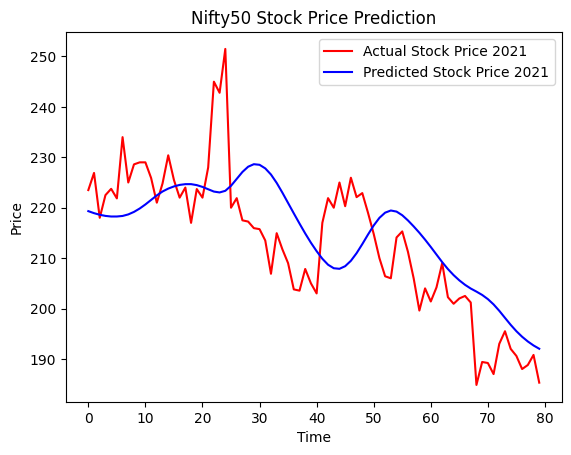

In [58]:
plt.plot(real_stock_price, color='red',label = 'Actual Stock Price 2021')
plt.plot(predicted_price, color='blue',label = 'Predicted Stock Price 2021')
plt.title("Nifty50 Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()